## Evaluación de un modelo y su aplicación para predicción

> **María de los Angeles Arista Huerta - A01369984**

Entregable 2 - Portafolio de analisis / *NOVIEMBRE 2022*

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Importar librerias

In [22]:
# Manipulación de los datos
import numpy as np
import pandas as pd

# Visualización de los datos
import matplotlib.pyplot as plt

# Modelos
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

> Carga del dataset


In [23]:
#Carga del dataset
df = pd.read_csv("/content/drive/MyDrive/Statistics/Indicadores.csv")
df.head()

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
0,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.274552,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.797501,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.442424,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.529866,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/03,111.940152,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


> Adaptación del dataset

Para la implementación solo son necesarias las columnas de valor y periodo

In [24]:
df = df[["Periodo", 
         "Valor"]]
df = df.loc[::-1].reset_index(drop=True)
df

,Periodo,Valor
0,1993/01,60.407691
1,1993/02,61.022521
2,1993/03,63.943249
3,1993/04,61.865984
4,1993/05,63.612900
...,...,...
350,2022/03,111.940152
351,2022/04,109.529866
352,2022/05,114.442424
353,2022/06,112.797501


<function matplotlib.pyplot.show(*args, **kw)>

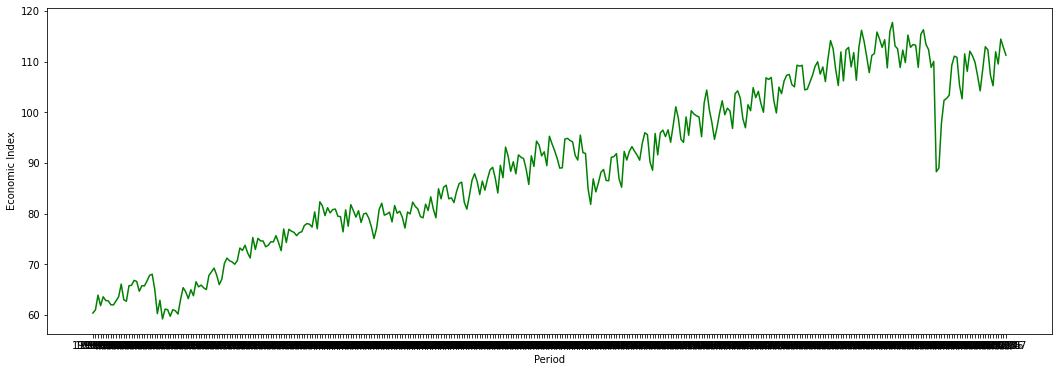

In [25]:
plt.figure(figsize=(18,6))
plt.plot(df.Periodo, df.Valor, color = "green")
plt.xlabel('Period')
plt.ylabel('Economic Index')
plt.show

> Analisis de estacionariedad

Siguiendo la caracteristica de considerar una serie estacionaria cuando el promedio o valor esperado de la serie es contante en el tiempo. Sin importar en qué periodod se enfoquen, el valor promedio de la serie es aproximadamente el mismo.

Para determinarlo se calcula el promedio del periodo.

In [26]:
avg = df.groupby(df.Periodo.str[0:4]).mean()
avg.head()

,Valor
Periodo,
1993,62.763073
1994,65.820599
1995,61.684299
1996,65.898989
1997,70.352236


<function matplotlib.pyplot.show(*args, **kw)>

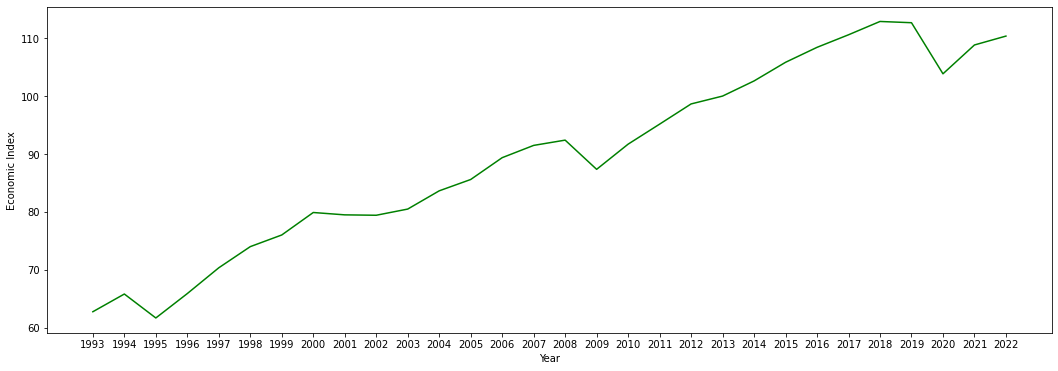

In [27]:
plt.figure(figsize=(18,6))
plt.plot(avg.index, avg.Valor, color = "green")
plt.xlabel('Year')
plt.ylabel('Economic Index')
plt.show

Después de graficar el promedio, podemos observar que no es una serie estacionaria, ya que muestra una tendencia creciente respecto al tiempo.

Para poder realizar la predicción de un periodo de tiempo, utilizaremos el modelo sarima, el cual necesita una entrada estacionaria, así que es necesario adaptar las variables.

In [28]:
df['LNValor'] = np.log(df['Valor'])
df['CCValor'] = df['LNValor'] - df['LNValor'].shift(12)
df.head()

,Periodo,Valor,LNValor,CCValor
0,1993/01,60.407691,4.101116,NaN
1,1993/02,61.022521,4.111243,NaN
2,1993/03,63.943249,4.157996,NaN
3,1993/04,61.865984,4.124970,NaN
4,1993/05,63.612900,4.152816,NaN


In [29]:
df = df.dropna().reset_index(drop=True)
df.head()

,Periodo,Valor,LNValor,CCValor
0,1994/01,63.029268,4.143599,0.042483
1,1994/02,62.733156,4.138890,0.027647
2,1994/03,65.790275,4.186472,0.028476
3,1994/04,65.891716,4.188013,0.063042
4,1994/05,66.858802,4.202583,0.049767


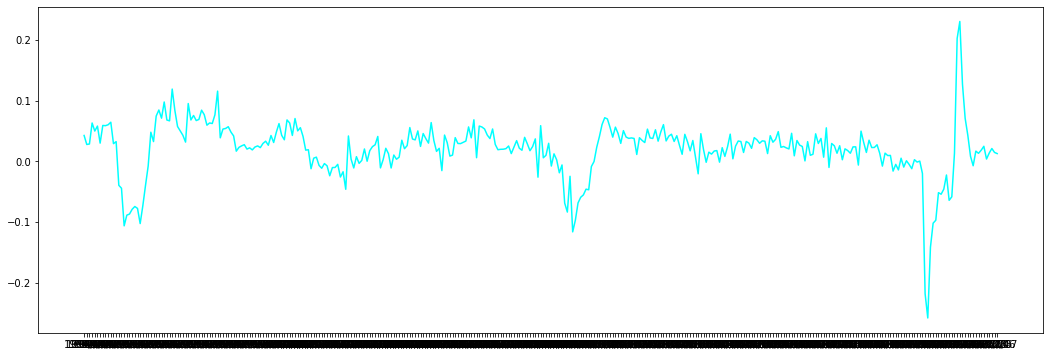

In [31]:
plt.figure(figsize=(18,6))
plt.plot(df.Periodo, df['CCValor'], color = "cyan")
plt.show()

In [33]:
fuller = adfuller(df['CCValor'])
fuller

(-3.767291622294237,
 0.0032602635598127376,
 17,
 325,
 {'1%': -3.450632157720528,
  '5%': -2.870474482366864,
  '10%': -2.5715301325443787},
 -1446.8289417719393)

Después de implementar el "Dicky Fuller Test" se obtienen los siguientes resultados:

* Test Statistic: **-3.7672**
* P-value: **0.00326**
* Number of Lags Used: **17**
* Number of Observations Uded: **325**
* Valores críticos:
 * 1% : -3.4506
 
 * 5% : -2.8704

 * 10% : -2.5715

Al tener un P-value menor que el nivel de significancia definido, rechazamos la Hipótesis Nula, por lo que podemos concluir que la serie temporal es estacionaria.

Otra forma de interpretar esta prueba es usando el valor crítico, al tener un test statistics que llega a -3.76 y ser menor que el valor crítico se tiene pruebas suficientes para rechazar la hipótesis nula. Con ello se confirma que la serie temporal **es estacionaria**.

> Graficas de PACF y ACF

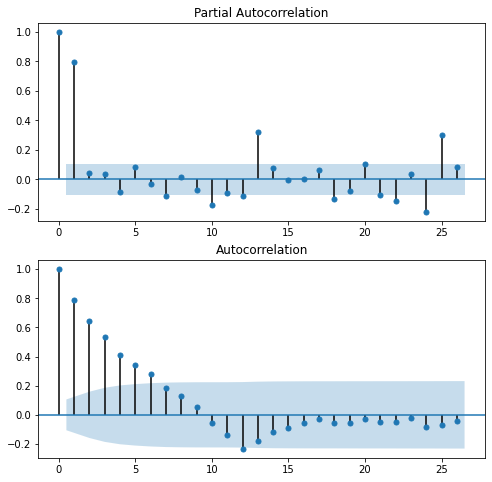

In [34]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(df['CCValor'], ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(df['CCValor'], ax=ax2)

ACF como PACF muestran valores significativos al pasar el intervalo de confianza

Cada 12 rezagos podemos observar una correlación significativa en PCAF

> Implementación de modelo SARIMA

Definimos (p,d,q)(P,D,Q)
 * al ser el primer retraso el más significativo **p = 1**
 * al ser proceso estacionario **d = 0**
 * al utilizar una diferencia para ser estacional **D = 1**
 * al tener patron estacional **Q = 1**

In [35]:
data = df[["Periodo","LNValor"]].set_index('Periodo')
data

,LNValor
Periodo,
1994/01,4.143599
1994/02,4.138890
1994/03,4.186472
1994/04,4.188013
1994/05,4.202583
...,...
2022/03,4.717964
2022/04,4.696197
2022/05,4.740072


In [36]:
MSarima = sm.tsa.statespace.SARIMAX(data['LNValor'], 
                                    oder=(1,0,1), 
                                    seasonal_order = (0,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
sarima = MSarima.fit()
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              LNValor   No. Observations:                  343
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 766.106
Date:                              Sat, 26 Nov 2022   AIC                          -1526.212
Time:                                      03:15:57   BIC                          -1514.805
Sample:                                  01-01-1994   HQIC                         -1521.662
                                       - 07-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9808      0.014     72.507      0.000       0.954       1.007
ma.S.L12      -0.8392      0.046    -18.201      0.000      -0.930      -0.749
sigma2         0.0005   1.43e-05     38.062      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  10.59   Jarque-Bera (JB):              5308.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

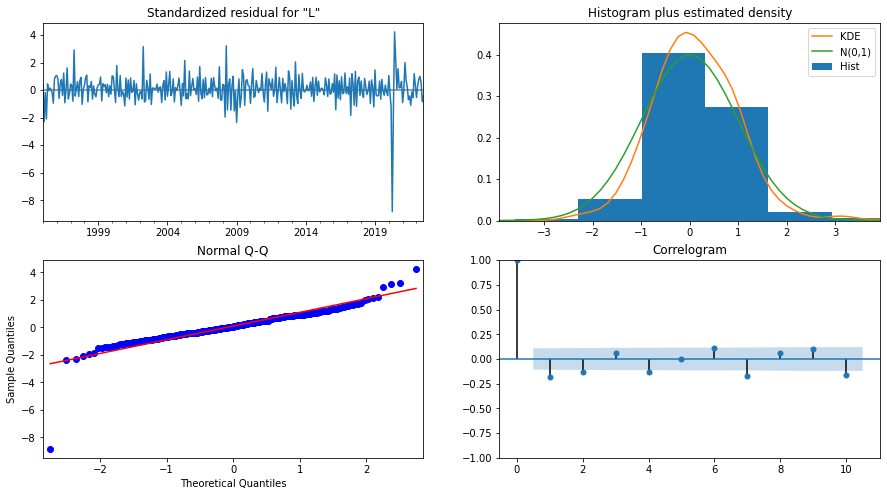

In [38]:
sarima.plot_diagnostics(figsize=(15,8))
plt.show()

Con relacion al ultimo mes el porcentaje de crecimiento anual es positivo y significativo 98.08% 

Con relacion al año anterior el porcentaje de crecimiento anual es negativo y significativo -83.92%

La seria es de ruido blanco al no sobre pasar los intervalos de confianza en el correlograma.

> Predicciones

In [39]:
PredSarima = sarima.predict(start=df.shape[0], end=df.shape[0] + 12)
PredSarima = np.exp(PredSarima)
PredSarima.reset_index(drop=True, inplace=True)
PredSarima

0     110.913866
1     108.027905
2     113.514873
3     115.351091
4     113.801753
5     109.833494
6     107.052488
7     112.063574
8     107.510540
9     111.182513
10    111.470516
11    110.905524
12    110.553097
Name: predicted_mean, dtype: float64

In [40]:
pred = df['Valor'].append(PredSarima, ignore_index = True)
pred

0       63.029268
1       62.733156
2       65.790275
3       65.891716
4       66.858802
          ...    
351    107.510540
352    111.182513
353    111.470516
354    110.905524
355    110.553097
Length: 356, dtype: float64

In [41]:
year = pred.loc[343:355]
year

343    110.913866
344    108.027905
345    113.514873
346    115.351091
347    113.801753
348    109.833494
349    107.052488
350    112.063574
351    107.510540
352    111.182513
353    111.470516
354    110.905524
355    110.553097
dtype: float64

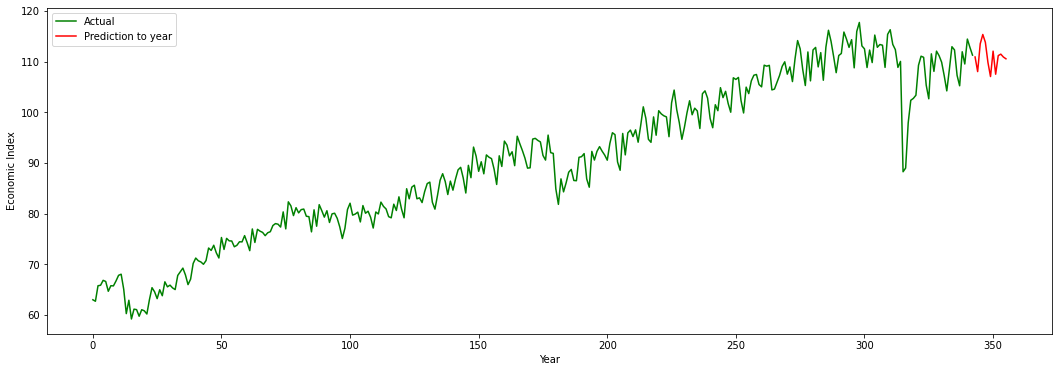

In [42]:
plt.figure(figsize=(18,6))
plt.plot(df["Valor"], label = 'Actual', color = 'green')
plt.plot(year, label='Prediction to year', color = 'red')
plt.xlabel('Year')
plt.ylabel('Economic Index')
plt.legend()
plt.show()

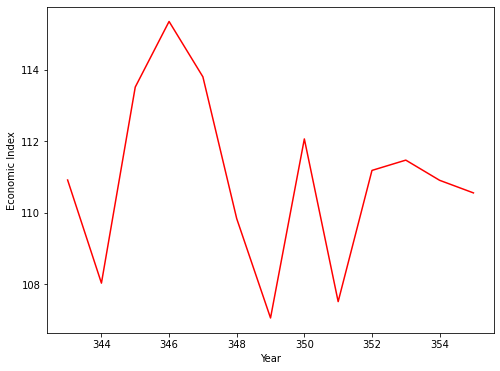

In [44]:
plt.figure(figsize=(8,6))
plt.plot(year, color = 'red')
plt.xlabel('Year')
plt.ylabel('Economic Index')
plt.show()

Finalmente en las predicciones mostradas a un año, se puede ver que existe una regularización con tendencia de inicio creciente y posteriormente decreciente.